# Flow of SQL Agent

![SQL Agent flow image](sql-agent-flow.png "Sql Agent Flow")


In [8]:
import sqlite3

# create a database
connection = sqlite3.connect("mydb.db")
connection

In [9]:
# Creating tables Schemas
table_creation_query="""
CREATE TABLE IF NOT EXISTS employees (
    emp_id INTEGER PRIMARY KEY,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    hire_date TEXT NOT NULL,
    salary REAL NOT NULL
);
"""

table_creation_query2="""
CREATE TABLE IF NOT EXISTS customers (
    customer_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    phone TEXT
);
"""

table_creation_query3="""
CREATE TABLE IF NOT EXISTS orders (
    order_id INTEGER PRIMARY KEY AUTOINCREMENT,
    customer_id INTEGER NOT NULL,
    order_date TEXT NOT NULL,
    amount REAL NOT NULL,
    FOREIGN KEY (customer_id) REFERENCES customers (customer_id)
);

"""

In [10]:
# Connection to the database via cursor
cursor=connection.cursor()

# execute the table creation queries via cursor
cursor.execute(table_creation_query)
cursor.execute(table_creation_query2)
cursor.execute(table_creation_query3)

In [11]:
# Inserting data into the tables

# Insert Data Schema
insert_query = """
INSERT INTO employees (emp_id, first_name, last_name, email, hire_date, salary)
VALUES (?, ?, ?, ?, ?, ?);
"""

insert_query_customers = """
INSERT INTO customers (customer_id, first_name, last_name, email, phone)
VALUES (?, ?, ?, ?, ?);
"""

insert_query_orders = """
INSERT INTO orders (order_id, customer_id, order_date, amount)
VALUES (?, ?, ?, ?);
"""

# Insert Data
employee_data = [
    (1, "Sunny", "Savita", "sunny.sv@abc.com", "2023-06-01", 50000.00),
    (2, "Arhun", "Meheta", "arhun.m@gmail.com", "2022-04-15", 60000.00),
    (3, "Alice", "Johnson", "alice.johnson@jpg.com", "2021-09-30", 55000.00),
    (4, "Bob", "Brown", "bob.brown@uio.com", "2020-01-20", 45000.00),
    ]

customers_data = [
    (1, "John", "Doe", "john.doe@example.com", "1234567890"),
    (2, "Jane", "Smith", "jane.smith@example.com", "9876543210"),
    (3, "Emily", "Davis", "emily.davis@example.com", "4567891230"),
    (4, "Michael", "Brown", "michael.brown@example.com", "7894561230"),
]

orders_data = [
    (1, 1, "2023-12-01", 250.75),
    (2, 2, "2023-11-20", 150.50),
    (3, 3, "2023-11-25", 300.00),
    (4, 4, "2023-12-02", 450.00),
]

# Execute the insert queries via cursor
cursor.executemany(insert_query,employee_data)
cursor.executemany(insert_query_customers,customers_data)
cursor.executemany(insert_query_orders,orders_data)

In [12]:
# Commit the changes to the database
connection.commit()

### Listing Tables

In [13]:
# Execute a query to fetch all order
cursor.execute("select * from employees")

for row in cursor.fetchall():
    print(row)

(1, 'Sunny', 'Savita', 'sunny.sv@abc.com', '2023-06-01', 50000.0)
(2, 'Arhun', 'Meheta', 'arhun.m@gmail.com', '2022-04-15', 60000.0)
(3, 'Alice', 'Johnson', 'alice.johnson@jpg.com', '2021-09-30', 55000.0)
(4, 'Bob', 'Brown', 'bob.brown@uio.com', '2020-01-20', 45000.0)


In [14]:
# Execute a query to fetch all order
cursor.execute("select * from customers")

for row in cursor.fetchall():
    print(row)

(1, 'John', 'Doe', 'john.doe@example.com', '1234567890')
(2, 'Jane', 'Smith', 'jane.smith@example.com', '9876543210')
(3, 'Emily', 'Davis', 'emily.davis@example.com', '4567891230')
(4, 'Michael', 'Brown', 'michael.brown@example.com', '7894561230')


In [15]:
# Execute a query to fetch all order
cursor.execute("select * from orders")

for row in cursor.fetchall():
    print(row)

(1, 1, '2023-12-01', 250.75)
(2, 2, '2023-11-20', 150.5)
(3, 3, '2023-11-25', 300.0)
(4, 4, '2023-12-02', 450.0)


In [16]:
import pandas as pd

def display_table(connection, table_name):
    # Create a cursor
    cursor = connection.cursor()
    
    # Execute query
    cursor.execute(f'SELECT * FROM {table_name}')
    
    # Get column names
    columns = [description[0] for description in cursor.description]
    
    # Convert to DataFrame
    df = pd.DataFrame(cursor.fetchall(), columns=columns)
    
    # Return the DataFrame
    return df

# Example usage:
print("Employees Table:")
employees_df = display_table(connection, 'employees')
print(employees_df)
print("\n")

print("Customers Table:")
customers_df = display_table(connection, 'customers')
print(customers_df)
print("\n")

print("Orders Table:")
orders_df = display_table(connection, 'orders')
print(orders_df)


Employees Table:
   emp_id first_name last_name                  email   hire_date   salary
0       1      Sunny    Savita       sunny.sv@abc.com  2023-06-01  50000.0
1       2      Arhun    Meheta      arhun.m@gmail.com  2022-04-15  60000.0
2       3      Alice   Johnson  alice.johnson@jpg.com  2021-09-30  55000.0
3       4        Bob     Brown      bob.brown@uio.com  2020-01-20  45000.0


Customers Table:
   customer_id first_name last_name                      email       phone
0            1       John       Doe       john.doe@example.com  1234567890
1            2       Jane     Smith     jane.smith@example.com  9876543210
2            3      Emily     Davis    emily.davis@example.com  4567891230
3            4    Michael     Brown  michael.brown@example.com  7894561230


Orders Table:
   order_id  customer_id  order_date  amount
0         1            1  2023-12-01  250.75
1         2            2  2023-11-20  150.50
2         3            3  2023-11-25  300.00
3         4       

In [17]:
# From Langchain Community we are importing SQLDatabase to execute the queries through the agent on db
from langchain_community.utilities import SQLDatabase

In [18]:
# Creating a SQLDatabase object -> mydb.db from the local directory
db = SQLDatabase.from_uri("sqlite:///mydb.db")
db

In [19]:
# Example of getting the table names through untility tool
db.get_usable_table_names()

['customers', 'employees', 'orders']

### Loading Model: llama from ChatGroq

In [20]:
import os
from dotenv import load_dotenv

load_dotenv()

from langchain_groq import ChatGroq


llm = ChatGroq(model="llama3-8b-8192", api_key=os.getenv("GROQ_API_KEY"))
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x10f621e80>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x10f6442f0>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [21]:
llm.invoke("Hello, how are you?")

AIMessage(content="Hello! I'm just an AI, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to help with any questions or tasks you may have. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 16, 'total_tokens': 62, 'completion_time': 0.038333333, 'prompt_time': 0.003131164, 'queue_time': 0.23715138700000002, 'total_time': 0.041464497}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_dadc9d6142', 'finish_reason': 'stop', 'logprobs': None}, id='run-ebfd7332-3113-450b-b41e-9afc21871a0c-0', usage_metadata={'input_tokens': 16, 'output_tokens': 46, 'total_tokens': 62})

### SQLDatabaseToolkit

- Natural Language to SQL Translation: This toolkit allows users to interact with databases using natural language rather than having to write SQL queries directly.

- Ready-made Tools: The get_tools() method provides several useful tools, including:
    - **sql_db_query**: Executes SQL queries against your database
    - **sql_db_schema**: Retrieves the database schema
    - **sql_db_list_tables**: Lists available tables
    - And other database interaction tools

- Integration with LLMs: By providing the language model (llm) to the toolkit, it can leverage the LLM's capabilities to understand user requests and generate appropriate SQL.

- Building SQL Agents: These tools are typically used to create an agent that can handle database-related tasks through conversation, making database interactions more accessible to non-technical users.

In [22]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit

toolkit = SQLDatabaseToolkit(db=db, llm=llm) ## takes db and llm model.

tools = toolkit.get_tools()

print("Available tools:")
for tool in tools:
    print(tool.name)

Available tools:
sql_db_query
sql_db_schema
sql_db_list_tables
sql_db_query_checker


In [23]:
for tool in tools:
    # Check if the tool's name is "sql_db_list_tables"
    if tool.name == "sql_db_list_tables":
        list_tables_tool = tool
        break

In [24]:
for tool in tools:
    # Check if the tool's name is "sql_db_schema"
    if tool.name == "sql_db_schema":
        # If found, assign it to get_schema_tool
        get_schema_tool = tool
        break 

In [25]:
llm_to_get_schema=llm.bind_tools([get_schema_tool])
llm_to_get_schema

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x10f621e80>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x10f6442f0>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'sql_db_schema', 'description': 'Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', 'parameters': {'properties': {'table_names': {'description': "A comma-separated list of the table names for which to return the schema. Example input: 'table1, table2, table3'", 'type': 'string'}}, 'required': ['table_names'], 'type': 'object'}}}]}, config={}, config_factories=[])

### Building custom tool

In [26]:
from langchain.tools import tool

# The @tool Decorator: This marks the function as a LangChain tool, making it available for use by a language model agent. 
# Tools in LangChain are functions that agents can call to perform specific tasks.
@tool
def query_to_database(query: str) -> str:
    """
        Execute a SQL query against the database and return the result.
        If the query is invalid or returns no result, an error message will be returned.
        In case of an error, the user is advised to rewrite the query and try again.
    """
    
    # runs the query and if it is invalid or returns no result, gracefully handles it will return an error message.
    result = db.run_no_throw(query) 
    
    
    if not result:
        return "No result returned from the query. Please try again."
    return result

In [27]:
# Example of using the tool
query_to_database.invoke("select * from employees")

"[(1, 'Sunny', 'Savita', 'sunny.sv@abc.com', '2023-06-01', 50000.0), (2, 'Arhun', 'Meheta', 'arhun.m@gmail.com', '2022-04-15', 60000.0), (3, 'Alice', 'Johnson', 'alice.johnson@jpg.com', '2021-09-30', 55000.0), (4, 'Bob', 'Brown', 'bob.brown@uio.com', '2020-01-20', 45000.0)]"

In [28]:
## Tool binding
"""
First, it binds the query_to_database tool to the language model (LLM).
This essentially gives the LLM access to the database query functionality.
"""
llm_with_tools = llm.bind_tools([query_to_database])

# Now, when the LLM is asked to show all employees, it can use the query_to_database tool to execute the query.
llm_with_tools.invoke("Show all the employees") # it executes "select * from employees;"


AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_0b4j', 'function': {'arguments': '{"query":"SELECT * FROM employees"}', 'name': 'query_to_database'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 70, 'prompt_tokens': 946, 'total_tokens': 1016, 'completion_time': 0.058333333, 'prompt_time': 0.142222564, 'queue_time': 0.25851171700000003, 'total_time': 0.200555897}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_dadc9d6142', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-41cef6cd-2b74-4f73-9403-1764b86f17fe-0', tool_calls=[{'name': 'query_to_database', 'args': {'query': 'SELECT * FROM employees'}, 'id': 'call_0b4j', 'type': 'tool_call'}], usage_metadata={'input_tokens': 946, 'output_tokens': 70, 'total_tokens': 1016})

In [29]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

from typing import Annotated, Literal
from langchain_core.messages import AIMessage
from langchain_core.pydantic_v1 import BaseModel, Field
from typing_extensions import TypedDict
from langgraph.graph import END, StateGraph, START
from langgraph.graph.message import AnyMessage, add_messages
from typing import Any
from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnableLambda, RunnableWithFallbacks
from langgraph.prebuilt import ToolNode

In [30]:
from langchain_core.prompts import ChatPromptTemplate

"""
System Prompt: The query_check_system string defines the role and task for the LLM. 
It instructs the model to act as a SQL expert and outlines specific common mistakes to look for in SQL queries.
"""
query_check_system = """

You are a SQL expert. Carefully review the SQL query for common mistakes, including:

Issues with NULL handling (e.g., NOT IN with NULLs)
Improper use of UNION instead of UNION ALL
Incorrect use of BETWEEN for exclusive ranges
Data type mismatches or incorrect casting
Quoting identifiers improperly
Incorrect number of arguments in functions
Errors in JOIN conditions

If you find any mistakes, rewrite the query to fix them. If it's correct, reproduce it as is.

"""


"""
 The ChatPromptTemplate.from_messages method creates a prompt template that combines the system message with a placeholder for user messages. 
 This allows for dynamic input where the user can provide a SQL query for review.
"""
query_check_prompt = ChatPromptTemplate.from_messages([("system", query_check_system), ("placeholder", "{query}")])


"""
Combining with Tools: 
The line check_generated_query = query_check_prompt | llm_with_tools 
combines the prompt template with the LLM that has access to the database tools. This means that when the LLM processes a query, 
it can also utilize the query_to_database tool if needed.
"""
check_generated_query = query_check_prompt | llm_with_tools

In [31]:
check_generated_query.invoke({"messages": [("user", "select * from employees;")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_caby', 'function': {'arguments': '{"query":"SELECT * FROM table_name WHERE condition"}', 'name': 'query_to_database'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 73, 'prompt_tokens': 1039, 'total_tokens': 1112, 'completion_time': 0.060833333, 'prompt_time': 0.129709263, 'queue_time': 0.237009065, 'total_time': 0.190542596}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_179b0f92c9', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-4012f1be-734b-453a-a3d4-4baaa681e789-0', tool_calls=[{'name': 'query_to_database', 'args': {'query': 'SELECT * FROM table_name WHERE condition'}, 'id': 'call_caby', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1039, 'output_tokens': 73, 'total_tokens': 1112})

In [32]:
# Some incorrect queries which will we still get the correct result
check_generated_query.invoke({"messages": [("user", "SELECT +++ FROM Employees LIMITs 5;")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_0zns', 'function': {'arguments': '{"query":"SELECT * FROM table WHERE column = \'value\'"}', 'name': 'query_to_database'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 1039, 'total_tokens': 1121, 'completion_time': 0.068333333, 'prompt_time': 0.129759093, 'queue_time': 0.235014175, 'total_time': 0.198092426}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_179b0f92c9', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-09836305-f98c-44a5-910c-c5e17e81752f-0', tool_calls=[{'name': 'query_to_database', 'args': {'query': "SELECT * FROM table WHERE column = 'value'"}, 'id': 'call_0zns', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1039, 'output_tokens': 82, 'total_tokens': 1121})

In [33]:
check_generated_query.invoke({"messages": [("user", "SELECT everything FROM Employees LIMITs 5;")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ffkf', 'function': {'arguments': '{"query":"SELECT * FROM users WHERE age BETWEEN 18 AND 30"}', 'name': 'query_to_database'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 78, 'prompt_tokens': 1039, 'total_tokens': 1117, 'completion_time': 0.065, 'prompt_time': 0.130024622, 'queue_time': 0.236530541, 'total_time': 0.195024622}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_179b0f92c9', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-60ccaa8f-f5bd-43dd-af5a-84cc73d1edaa-0', tool_calls=[{'name': 'query_to_database', 'args': {'query': 'SELECT * FROM users WHERE age BETWEEN 18 AND 30'}, 'id': 'call_ffkf', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1039, 'output_tokens': 78, 'total_tokens': 1117})

Explanation:

Class Definition:
- The SubmitFinalAnswer class inherits from BaseModel, which is likely part of a data validation library (such as Pydantic). This class is designed to encapsulate the final answer that will be submitted to the user.
- The class has a single attribute, final_answer, which is a string. The Field(...) function is used to define this attribute, indicating that it is required (due to the ellipsis ...) and providing a description for clarity.
Tool Binding:
- The line llm_with_final_answer = llm.bind_tools([SubmitFinalAnswer]) binds the SubmitFinalAnswer class as a tool to the language model (LLM). This means that the LLM can now use this class to format and submit final answers to users.

Why is this useful?
- Structured Response: By encapsulating the final answer in a class, you ensure that the response adheres to a specific structure. This can help with validation and consistency in how answers are presented to users.
- Integration with LLM: Binding this class to the LLM allows the model to easily generate and submit final answers as part of its interaction with users. This can streamline the process of providing feedback or results based on previous queries.
- Enhanced Clarity: The description provided in the Field function helps clarify the purpose of the final_answer attribute, making the code more understandable for other developers or users interacting with the model.
- Potential for Expansion: This structure allows for easy expansion in the future. If you need to add more attributes or methods related to the final answer, you can do so within this class without disrupting the overall architecture.

Overall, this code snippet enhances the functionality of the LLM by providing a clear and structured way to submit final answers to users, improving the user experience and ensuring that responses are well-formed.

In [34]:
# Defining the Class for formatted output

class SubmitFinalAnswer(BaseModel):
    """Submit the final answer to the user based on the query results."""
    final_answer: str = Field(..., description="The final answer to the user's question.")
    
llm_with_final_answer = llm.bind_tools([SubmitFinalAnswer])

In [35]:
query_gen_system_prompt = """You are a SQL expert with a strong attention to detail.Given an input question, output a syntactically correct SQLite query to run, then look at the results of the query and return the answer.

1. DO NOT call any tool besides SubmitFinalAnswer to submit the final answer. When generating the query:

2. Output the SQL query that answers the input question without a tool call.

3. Unless the user specifies a specific number of examples they wish to obtain, always limit your query to at most 5 results.

4. You can order the results by a relevant column to return the most interesting examples in the database.

5. Never query for all the columns from a specific table, only ask for the relevant columns given the question.

6. If you get an error while executing a query, rewrite the query and try again.

7. If you get an empty result set, you should try to rewrite the query to get a non-empty result set.

8. NEVER make stuff up if you don't have enough information to answer the query... just say you don't have enough information.

9. If you have enough information to answer the input question, simply invoke the appropriate tool to submit the final answer to the user.

10. DO NOT make any DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the database. Do not return any sql query except answer.

11. rewrite this promote with very simple english and little shorter manner also """


"""
The ChatPromptTemplate.from_messages method is used to create a structured prompt that combines 
a system message (which defines the role and task of the LLM) with a placeholder for user input. 
This structure helps the LLM understand its role and the context in which it operates.
"""
query_gen_prompt = ChatPromptTemplate.from_messages([("system", query_gen_system_prompt), ("placeholder", "{messages}")])


"""
binds the prompt template to the LLM that has access to the SubmitFinalAnswer tool. 
This means that when the LLM generates a query and has an answer, it can use this tool to submit the final answer to the user.
"""
query_generator = query_gen_prompt | llm_with_final_answer

In [36]:
# Example of using the query generator
query_generator.invoke({"messages":[("ccan you fetch the data from employee table?")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_hjpe', 'function': {'arguments': '{"final_answer":"SELECT * FROM employee"}', 'name': 'SubmitFinalAnswer'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 78, 'prompt_tokens': 1230, 'total_tokens': 1308, 'completion_time': 0.065, 'prompt_time': 0.1633216, 'queue_time': 0.241190951, 'total_time': 0.2283216}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_dadc9d6142', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-85b28324-cf0e-497f-951e-37670ff52b3b-0', tool_calls=[{'name': 'SubmitFinalAnswer', 'args': {'final_answer': 'SELECT * FROM employee'}, 'id': 'call_hjpe', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1230, 'output_tokens': 78, 'total_tokens': 1308})

In [37]:
query_generator.invoke({"messages":[("can you give the count of employees in the company?")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_0d52', 'function': {'arguments': '{"final_answer":"SELECT COUNT(*) FROM employees"}', 'name': 'SubmitFinalAnswer'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 1231, 'total_tokens': 1303, 'completion_time': 0.06, 'prompt_time': 0.153502771, 'queue_time': 0.238273561, 'total_time': 0.213502771}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_a97cfe35ae', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-be532a8d-0cde-458f-b339-781e24d2db1f-0', tool_calls=[{'name': 'SubmitFinalAnswer', 'args': {'final_answer': 'SELECT COUNT(*) FROM employees'}, 'id': 'call_0d52', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1231, 'output_tokens': 72, 'total_tokens': 1303})

### Creating the Nodes

In [38]:
"""
Purpose: This class defines the structure of the State object, which holds the conversation messages.

Attributes: It has a single attribute, messages, which is a list of messages (of type AnyMessage). 

The Annotated type suggests that there may be additional processing or validation applied to the messages.
"""
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    
    
"""
Purpose: This function handles errors that occur during tool calls.

Parameters: It takes the state object as input.

Error Handling: It retrieves the error message from the state and the list of tool calls from the last message.

Return Value: It returns a dictionary containing messages that inform the user of the error, 
including the specific tool call that failed. Each error message is associated with the corresponding tool call ID.

Usage: This function is useful for providing feedback to users when something goes wrong during a tool invocation.
"""
def handle_tool_error(state:State):
    error = state.get("error") 
    tool_calls = state["messages"][-1].tool_calls
    
    return { "messages": [ ToolMessage(content=f"Error: {repr(error)}\n please fix your mistakes.",tool_call_id=tc["id"],) for tc in tool_calls ] }

"""
Purpose: This function creates a node that can execute a list of tools and handle errors with a fallback mechanism.

Parameters: It takes a list of tools as input.

Return Value: It returns a ToolNode that is configured to use the provided tools and includes a 
fallback to the handle_tool_error function if an error occurs during execution.

Usage: This setup allows for robust error handling in a system where multiple tools may be called, 
ensuring that users receive appropriate feedback if something goes wrong.
"""
def create_node_from_tool_with_fallback(tools:list)-> RunnableWithFallbacks[Any, dict]:
    return ToolNode(tools).with_fallbacks([RunnableLambda(handle_tool_error)], exception_key="error")

In [39]:
# Node Creation: This line creates a node named list_tables using the create_node_from_tool_with_fallback function.
# Tool Binding: The argument [list_tables_tool] indicates that this node will use the list_tables_tool, 
# which is presumably a tool designed to list the tables in a database.
list_tables=create_node_from_tool_with_fallback([list_tables_tool])

# Node Creation: This line creates a node named get_schema in a similar manner.
# Tool Binding: The argument [get_schema_tool] indicates that this node will use the get_schema_tool, 
# which is intended to retrieve the database schema.
get_schema=create_node_from_tool_with_fallback([get_schema_tool])

# Node Creation: This line creates a node named query_database.
# Tool Binding: The argument [query_to_database] indicates that this node will use the query_to_database tool, 
# which is responsible for executing SQL queries against the database.
query_database=create_node_from_tool_with_fallback([query_to_database])

In [40]:
"""
Purpose: This function is designed to be called when the first tool (in this case, sql_db_list_tables) is invoked in the conversation.

Parameters: It takes a state parameter, which represents the current state of the conversation.

Return Value: It returns a dictionary containing a list of messages. 
The message includes a tool call to sql_db_list_tables, which is likely intended to retrieve a list of tables from a SQL database.
"""

def first_tool_call(state: State) -> dict[str, list[AIMessage]]:
    """
    This function is called when the first tool is called.
    It takes the state of the conversation and returns a dictionary with the tool call and the list of messages.
    """
    return {"messages": [AIMessage(content="", tool_calls=[{"name":"sql_db_list_tables", "args":{}, "id": "tool_call_id"}])]}
    

In [41]:
"""
The primary purpose of this function is to validate or check the SQL query provided by the user. 
It leverages the check_generated_query mechanism, which is presumably set up to analyze SQL queries for correctness and provide feedback.
"""
def check_the_given_query(state: State):
    print(f"Checking the given query: {state}")
    
    """
    It invokes method on check_generated_query, passing in a dictionary that contains the last message from the state object.
    state["messages"][-1] retrieves the most recent message in the conversation, which is likely the SQL query that needs to be checked.
    """
    return {"messages": [check_generated_query.invoke({"messages": [state["messages"][-1]]})]}

- Query Generation: The primary purpose of this function is to generate a SQL query based on the user's input and the current state of the conversation.

- Error Handling: The function includes logic to catch cases where the language model (LLM) might "hallucinate" and call an incorrect tool. This is important for maintaining the integrity of the interaction and ensuring that users receive accurate feedback.

- User Guidance: By providing clear error messages, the function helps guide users in correcting their mistakes, reinforcing the correct usage of tools in the system.

In [42]:
# This state contains information about the current conversation, including user messages.
def generation_query(state: State):
    # calls the invoke method on query_generator, passing the current state. 
    # This generates a message that includes the SQL query based on the user's input.
    message = query_generator.invoke(state)
    
    # Sometimes, the LLM will hallucinate and call the wrong tool. We need to catch this and return an error message.
    tool_messages = [] # To collect any error messages related to tool calls.
    if message.tool_calls:
        for tc in message.tool_calls:
            # Other tools, like query_to_database, are used for different purposes 
            # (e.g., generating or executing SQL queries) and are not meant to be called directly 
            # in the context of submitting answers.
            # This ensures that the LLM only calls the SubmitFinalAnswer tool 
            # when it's ready to submit the final answer.

            if tc["name"] != "SubmitFinalAnswer":
                tool_messages.append(
                    ToolMessage(
                        content=f"""Error: The tool {tc['name']} is not valid. Please fix your mistakes. 
                        Remember to only call SubmitFinalAnswer to submit the final answer. 
                        Generated queries should be outputted WITHOUT a tool call.""",
                    ),
                    tool_call_id = tc["id"]
                )    
    else:
        tool_messages = []
    
    return {"messages": [message] + tool_messages}

In [43]:
def should_continue(state: State):
    print(f"State from should_continue: {state}")
    messages = state["messages"]
    last_message = messages[-1]
    
    print(f"Last message: {last_message}")
    
    if getattr(last_message, "tool_calls", None): # checks if the last message has any associated tool calls
        print("Last message is a tool call. Ending the conversation.")
        
        return END
    elif last_message.content.startswith("Error: "):
        print("Last message is an error. regenrating the query.")
        # suggesting that the system should return to the query generation phase to correct the issue.
        return "query_qen"
    else:
        print("Last message is a normal message. Continuing the conversation.")
        # the system should proceed to the next step in the query correction or generation process.
        return "correct_query"

In [44]:
"""
the llm_get_schema function retrieves the database schema by invoking the LLM with the current 
conversation messages.
"""

def llm_get_schema(state: State):
    print(f"Getting the llm_get_schema: {state}")
    # It invoke method on llm_to_get_schema, passing the list of messages from the current state.
    # This invocation is expected to trigger the LLM to process the messages and 
    # generate a response related to the database schema.
    messages = state["messages"]
    response = llm_to_get_schema.invoke(messages) # "llm_to_get_schema" output is the schema and sample rows for those tables # "llm_to_get_schema" output is the schema and sample rows for those tables
    
    return {"messages": [response]}

## Building Agent Workflow

In [45]:
"""
This initializes a new StateGraph object called workflow. The StateGraph is likely a structure that 
manages different states and transitions between them based on certain conditions or events. 
The State parameter indicates that the graph will use the State type to track the current state of the conversation or process.
"""
workflow = StateGraph(State)

"""
Node Name: "first_tool_call" is the name of the node.
Function: first_tool_call is the function that will be executed when this node is reached. 
This function likely initiates the first tool call in the workflow.
"""
workflow.add_node("first_tool_call", first_tool_call) # invokes sql_db_list_tables tool from SQLDatabaseToolkit
workflow.add_node("list_tables_tool", list_tables) # get list of tables from the database
workflow.add_node("model_get_schema", llm_get_schema) # get schema of the database from the model
workflow.add_node("get_schema_tool", get_schema) # get schema of the database
workflow.add_node("query_gen", generation_query) # generate the query
workflow.add_node("correct_query", check_the_given_query) # check the given query
workflow.add_node("execute_query", query_database) # execute the query

In [46]:
"""
The provided code snippet sets up the edges (or transitions) between nodes in a workflow 
represented by a StateGraph. This defines how the system moves from one state to another 
based on specific actions or conditions.
"""

# Start the workflow.
workflow.add_edge(START, "first_tool_call") # directed edge from the START node to the "first_tool_call" node

# This indicates that the next action is to list the tables in the database.
workflow.add_edge("first_tool_call", "list_tables_tool") # get list of tables from the database

# This indicates that the next action is to get the schema of the database from the model.
workflow.add_edge("list_tables_tool", "model_get_schema") # get schema of the database from the model

# responsible for interacting with the language model to retrieve the schema.
workflow.add_edge("model_get_schema", "get_schema_tool")

# This indicates that the next action is to generate the query.
workflow.add_edge("get_schema_tool", "query_gen") # generate the query

# This indicates that the next action is to check the given query.
workflow.add_conditional_edges("query_gen", should_continue, { END: END,"correct_query": "correct_query"}) # check the given query

# This indicates that the next action is to execute the query.
workflow.add_edge("correct_query", "execute_query") # execute the query

# This indicates that the next action is to generate the query.
workflow.add_edge("execute_query", "query_gen") # generate the query

In [47]:
app = workflow.compile()

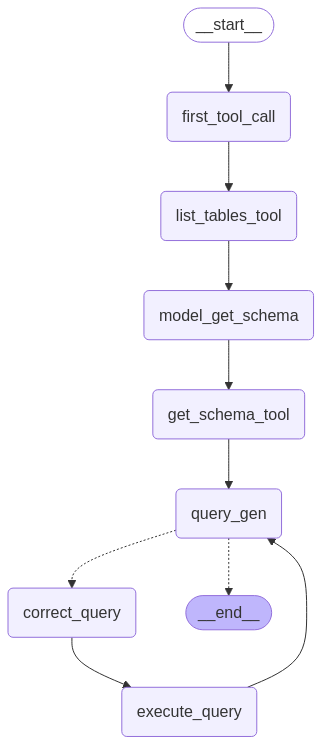

In [48]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [49]:
from langchain_core.messages import HumanMessage

query = {
    "messages": [
        HumanMessage(content="how many order are there which is more than 300 rupees?")
    ]
}

In [50]:
response=app.invoke(query)

Getting the llm_get_schema: {'messages': [HumanMessage(content='how many order are there which is more than 300 rupees?', additional_kwargs={}, response_metadata={}, id='6738dd8c-02bc-4b1e-8c0e-7263fc8a845d'), AIMessage(content='', additional_kwargs={}, response_metadata={}, id='a90f2b23-b9bf-4a3b-a004-358b49ab2d1a', tool_calls=[{'name': 'sql_db_list_tables', 'args': {}, 'id': 'tool_call_id', 'type': 'tool_call'}]), ToolMessage(content='customers, employees, orders', name='sql_db_list_tables', id='053ef46e-b796-4e5c-b308-469e894d5bca', tool_call_id='tool_call_id')]}
State from should_continue: {'messages': [HumanMessage(content='how many order are there which is more than 300 rupees?', additional_kwargs={}, response_metadata={}, id='6738dd8c-02bc-4b1e-8c0e-7263fc8a845d'), AIMessage(content='', additional_kwargs={}, response_metadata={}, id='a90f2b23-b9bf-4a3b-a004-358b49ab2d1a', tool_calls=[{'name': 'sql_db_list_tables', 'args': {}, 'id': 'tool_call_id', 'type': 'tool_call'}]), ToolMes

In [51]:
response["messages"][-1].tool_calls[0]["args"]["final_answer"]

'There are 2 orders which are more than 300 rupees'

### Basic Questions

About Customers Table: How many customers are in the customers table? List all customers with their email addresses. Show the phone numbers of customers whose last name is "Smith."

About Orders Table: How many orders are in the orders table? What is the total amount of all orders combined? List all orders placed on or after "2023-12-01." Using WHERE Clause: Which customers placed orders greater than $300? Show all customers whose email contains "example.com."

### Intermediate Questions

Joins: List all orders with the customer’s first and last name. Find the total amount spent by each customer. Show orders along with customer details where the order amount is greater than $200.

Aggregation: What is the average order amount? How many orders were placed by each customer? What is the highest order amount, and who placed it?

Date Queries: How many orders were placed in December 2023? Show customers who have not placed any orders. Find the most recent order date in the orders table. Advanced Questions 


### Subqueries:

Which customer placed the maximum number of orders? List customers who placed orders totaling more than $500. Find customers who haven't placed any orders yet. Window Functions (if supported):

Rank customers based on the total amount they spent. Show the running total of order amounts by date. Error Handling/Edge Cases:

What happens if a customer ID exists in orders but not in customers? How does the database behave when two customers have the same email address? Testing Agent Capabilities Complex Queries: Show the top 3 customers who spent the most money. List all customers and their total order amount, including those who haven't placed any orders (use LEFT JOIN). Find customers who placed orders only in the last 30 days.